## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

# New Section

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from collections import OrderedDict
from PIL import Image
from torch import Tensor


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Set dataset directory
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

# Define transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valid_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=valid_test_transforms)

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
valid_dataloader = DataLoader(valid_dataset, batch_size=64, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)


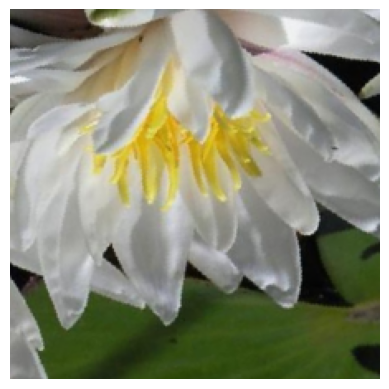

In [ ]:
def imshow_original(image):
    """Convert Tensor image back to original and display."""
    image = image.numpy().transpose((1, 2, 0))  # Convert to NumPy format
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean  # Unnormalize
    image = np.clip(image, 0, 1)  # Clip pixel values
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Get one batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Show a sample image
imshow_original(images[10])

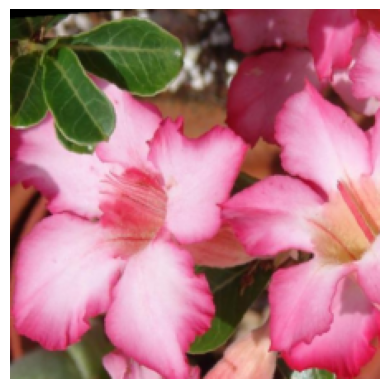

In [ ]:
image, label = next(iter(train_dataloader))
imshow_original(image[10])

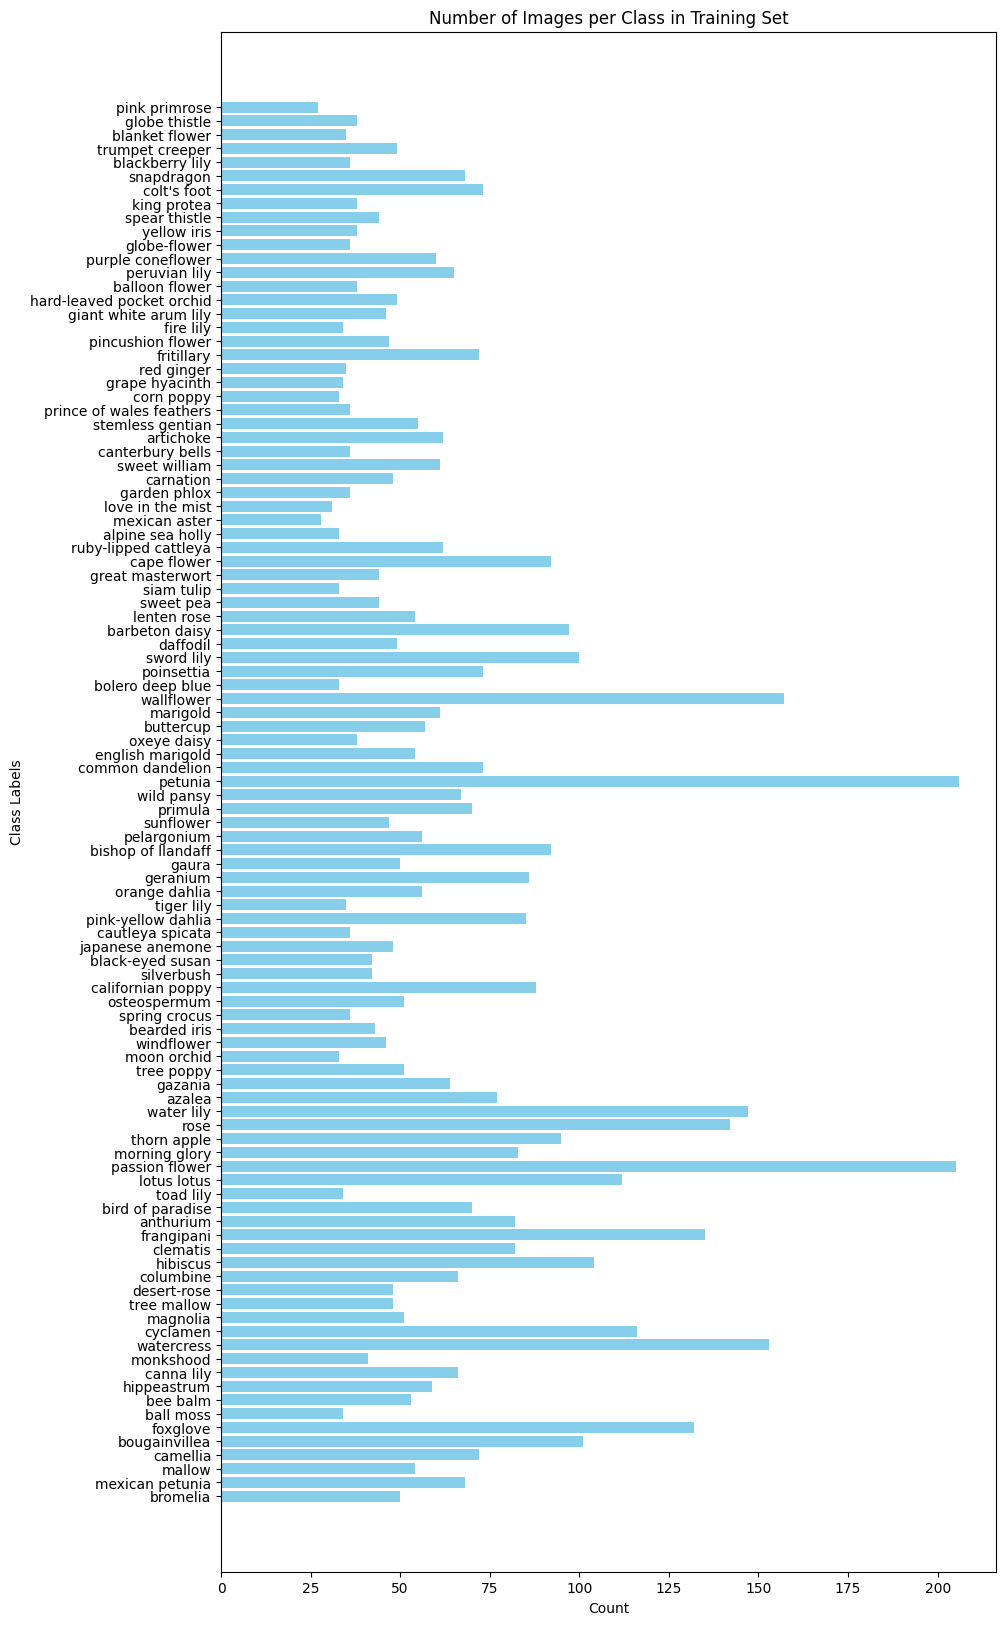

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load category name mapping
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Reverse the mapping of class indices to folder names
class_to_idx = train_dataset.class_to_idx  # {folder_name: index}
idx_to_class = {v: k for k, v in class_to_idx.items()}  # {index: folder_name}

# Count the number of images per class using PyTorch's dataset info
class_counts = Counter([label for _, label in train_dataset.samples])

# Sort by class index to align with `cat_to_name`
sorted_classes = sorted(class_counts.keys())
sorted_class_names = [cat_to_name[idx_to_class[i]] for i in sorted_classes]
sorted_counts = [class_counts[i] for i in sorted_classes]

# Plot bar chart
plt.figure(figsize=(10, 20))
plt.barh(range(1, len(sorted_classes) + 1), sorted_counts, color="skyblue")
plt.yticks(range(1, len(sorted_classes) + 1), sorted_class_names)
plt.xlabel("Count")
plt.ylabel("Class Labels")
plt.title("Number of Images per Class in Training Set")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 83.3MB/s]


In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Freeze parameters so we don't backprop through them
for param in vgg16.parameters():
    param.requires_grad = False

classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                          ('dropout', nn.Dropout(p=0.5)),
                          ('fc2', nn.Linear(4096, 102)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

vgg16.classifier = classifier
vgg16.class_idx_mapping = train_dataset.class_to_idx

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.0001)

In [ ]:
def validation(model, testloader, criterion, device):
    test_loss = 0
    accuracy = 0
    model.to(device)
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        # images.resize_(images.shape[0], 3, 224, 224)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()

    return test_loss, accuracy

In [ ]:
def train(model, trainloader, validloader, epochs, print_every, criterion, optimizer, device='cuda'):
    steps = 0

    # Change to train mode if not already
    model.train()
    # change to cuda
    model.to(device)

    for e in range(epochs):
        running_loss = 0

        for (images, labels) in trainloader:
            steps += 1

            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            # Forward and backward passes
            outputs = model.forward(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if steps % print_every == 0:

                # Make sure network is in eval mode for inference
                model.eval()

                # Turn off gradients for validation, saves memory and computations
                with torch.no_grad():
                    validation_loss, accuracy = validation(model, validloader, criterion, device)

                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Validation Loss: {:.3f}.. ".format(validation_loss/len(validloader)),
                      "Validation Accuracy: {:.3f}".format((accuracy/len(validloader))*100))

                model.train()

                running_loss = 0

In [ ]:
train(model=vgg16,
        trainloader=train_dataloader,
        validloader=valid_dataloader,
        epochs=3,
        print_every=20,
        criterion=criterion,
        optimizer=optimizer,
        device="cuda")

Epoch: 1/3..  Training Loss: 1.133..  Validation Loss: 0.656..  Validation Accuracy: 83.524
Epoch: 1/3..  Training Loss: 1.105..  Validation Loss: 0.592..  Validation Accuracy: 84.654
Epoch: 1/3..  Training Loss: 1.054..  Validation Loss: 0.534..  Validation Accuracy: 86.442
Epoch: 1/3..  Training Loss: 1.049..  Validation Loss: 0.493..  Validation Accuracy: 88.553
Epoch: 1/3..  Training Loss: 1.049..  Validation Loss: 0.481..  Validation Accuracy: 88.106
Epoch: 2/3..  Training Loss: 0.817..  Validation Loss: 0.495..  Validation Accuracy: 86.923
Epoch: 2/3..  Training Loss: 0.826..  Validation Loss: 0.459..  Validation Accuracy: 88.260
Epoch: 2/3..  Training Loss: 0.890..  Validation Loss: 0.425..  Validation Accuracy: 89.548
Epoch: 2/3..  Training Loss: 0.814..  Validation Loss: 0.428..  Validation Accuracy: 88.808
Epoch: 2/3..  Training Loss: 0.923..  Validation Loss: 0.455..  Validation Accuracy: 87.779
Epoch: 3/3..  Training Loss: 0.538..  Validation Loss: 0.437..  Validation Accur

In [ ]:
def check_accuracy_on_test(testloader, model):
    correct = 0
    total = 0
    model.to(device)
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total

In [ ]:
test_accuracy = check_accuracy_on_test(test_dataloader, vgg16)
print('Accuracy of the network on the 10000 test images: %d %%' % test_accuracy)

Accuracy of the network on the 10000 test images: 86 %


In [ ]:
vgg16.class_idx_mapping = train_dataset.class_to_idx

In [ ]:
def save_checkpoint(state, filename='checkpoint.pth'):
    torch.save(state, filename)

In [ ]:
save_checkpoint({
            'epoch': 3,
            'classifier': vgg16.classifier,
            'state_dict': vgg16.state_dict(),
            'optimizer' : optimizer.state_dict(),
            'class_idx_mapping': vgg16.class_idx_mapping,
            'arch': "vgg16"
            })

In [ ]:
def load_model(model_checkpoint):
    """
    Loads the model from a checkpoint file.

    Arguments:
        model_checkpoint: Path to checkpoint file

    Returns:
        model: Loaded model.
        idx_class_mapping: Index to class mapping for further evaluation.
    """

    checkpoint = torch.load(model_checkpoint)

    model = models.vgg16(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    model.classifier = checkpoint["classifier"]
    model.load_state_dict(checkpoint["state_dict"])

    return model

In [ ]:
model = load_model(model_checkpoint="checkpoint.pth")

<ipython-input-23-2a02e7cb78b1>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint)


Original image with size: (667, 500)


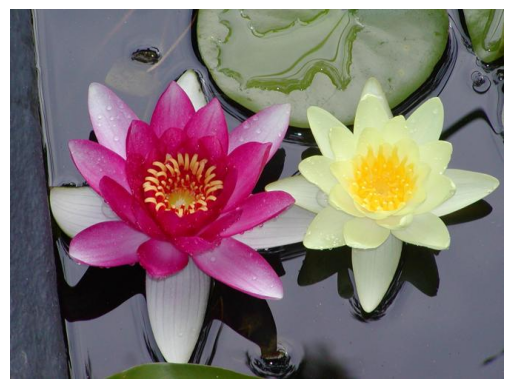

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the dataset directories
data_dir = "flowers"
train_dir = os.path.join(data_dir, "train")

# Automatically get a valid image path from the dataset
class_folders = os.listdir(train_dir)  # List class subdirectories (e.g., '1', '2', etc.)
first_class_path = os.path.join(train_dir, class_folders[0])  # Get first class folder
image_file = os.listdir(first_class_path)[0]  # Get the first image file
image_path = os.path.join(first_class_path, image_file)  # Full image path

# Load and display the image
img = Image.open(image_path)
print("Original image with size: {}".format(img.size))
plt.imshow(img)
plt.axis("off")  # Hide axes for a cleaner image display
plt.show()

In [ ]:
import os
import numpy as np
from PIL import Image

def process_image(img_path):
    '''Scales, crops, and normalizes a PIL image for a PyTorch model,
       returns a NumPy array.
    '''
    img = Image.open(img_path)

    # Resize while maintaining aspect ratio
    img.thumbnail((256, 256))

    # Center crop to 224x224
    w, h = img.size
    left = (w - 224) / 2
    right = (w + 224) / 2
    top = (h - 224) / 2
    bottom = (h + 224) / 2
    img = img.crop((left, top, right, bottom))

    # Convert to numpy array and normalize
    np_img = np.array(img) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_img = (np_img - mean) / std

    # Reorder dimensions (H, W, C) -> (C, H, W) for PyTorch
    np_img = np_img.transpose((2, 0, 1))

    return np_img

# Get a valid image path dynamically
data_dir = "flowers"
train_dir = os.path.join(data_dir, "train")

# Select an image from the dataset
class_folders = os.listdir(train_dir)  # Get class folders ('1', '2', etc.)
first_class_path = os.path.join(train_dir, class_folders[0])  # First class folder
image_file = os.listdir(first_class_path)[0]  # First image in the folder
image_path = os.path.join(first_class_path, image_file)  # Full image path

# Process image
processed_img = process_image(image_path)
print("Processed image shape:", processed_img.shape)  # Should be (3, 224, 224)


Processed image shape: (3, 224, 224)


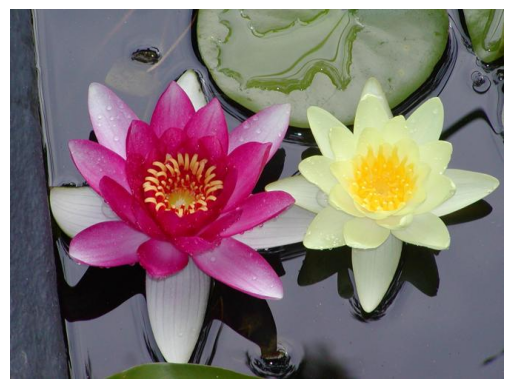

In [ ]:
plt.imshow(img)
plt.axis("off")  # Optional: Hide axis labels
plt.show()


In [ ]:
class_idx_mapping = train_dataset.class_to_idx
idx_class_mapping = {v: k for k, v in class_idx_mapping.items()}  # Removed the comma


In [ ]:
def predict(image_path, model_checkpoint, topk=5, device="cpu", idx_class_mapping=None):
    '''
    Predict the class (or classes) of an image using a trained deep learning model.

    Arguments:
        image_path (str): Path to the image
        model_checkpoint (str): Path to the saved model checkpoint
        topk (int): Number of top predictions to return
        device (str): "cpu" or "cuda"
        idx_class_mapping (dict): Dictionary mapping class indices to actual labels

    Returns:
        probs (list): Probabilities of the top K classes
        classes (list): Predicted class labels as strings
    '''

    # Load model
    model = load_model(model_checkpoint)
    model.to(device)
    model.eval()

    # Process image
    np_img = process_image(image_path)  # Ensure this function returns a NumPy array
    img_tensor = torch.from_numpy(np_img).type(torch.FloatTensor).unsqueeze(0).to(device)

    # Forward pass
    with torch.no_grad():
        log_probabilities = model(img_tensor)

    # Convert to probabilities
    probabilities = torch.exp(log_probabilities)

    # Get top K predictions
    probs, indices = probabilities.topk(topk)

    # Convert to lists
    probs = probs.cpu().numpy().squeeze().tolist()
    indices = indices.cpu().numpy().squeeze().tolist()

    # Use provided class index mapping
    if idx_class_mapping is None:
        raise ValueError("idx_class_mapping must be provided.")

    # Convert indices to class labels
    classes = [str(idx_class_mapping[idx]) for idx in indices]

    return probs, classes


In [ ]:
probs, classes = predict("flowers/test/100/image_07899.jpg", "checkpoint.pth", idx_class_mapping=idx_class_mapping)
print(probs)
print(classes)

<ipython-input-23-2a02e7cb78b1>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint)


[0.9989307522773743, 0.0004442659846972674, 0.0002782380033750087, 0.00015795316721778363, 9.284250700147822e-05]
['100', '5', '54', '59', '71']


In [ ]:
print(probs)
print(classes)

[0.9989307522773743, 0.0004442659846972674, 0.0002782380033750087, 0.00015795316721778363, 9.284250700147822e-05]
['100', '5', '54', '59', '71']


<ipython-input-23-2a02e7cb78b1>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint)


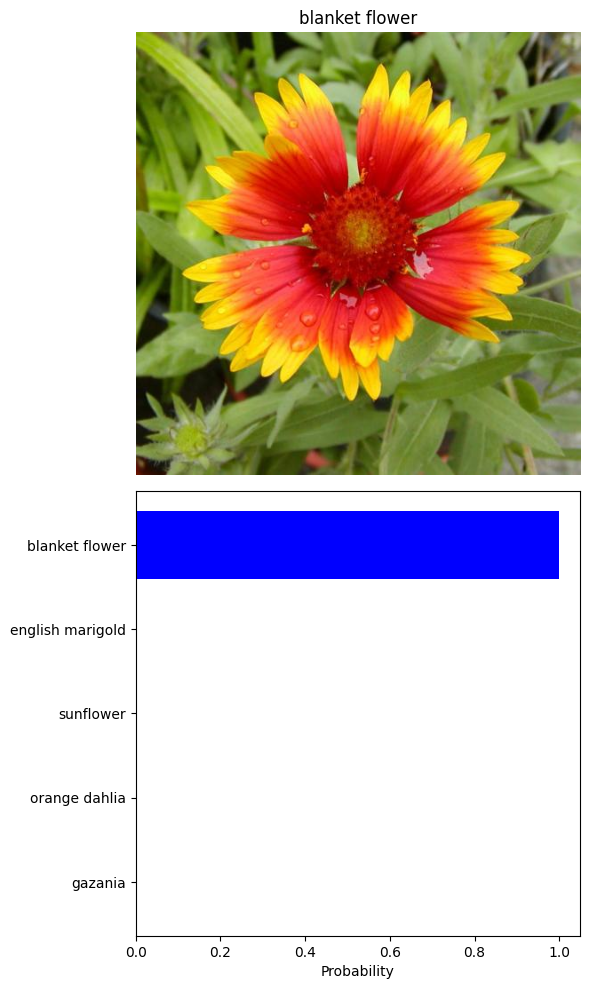

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
from PIL import Image

def imshow(image, ax=None, title=None):
    """Imshow for a NumPy array"""
    if ax is None:
        fig, ax = plt.subplots()

    # Convert from PyTorch tensor format
    image = image.transpose((1, 2, 0))

    # Unnormalize the image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')

    return ax

def sanity_check(image_path, model_checkpoint, idx_class_mapping, cat_to_name):
    """Displays the image along with a bar chart of the top-5 predicted class probabilities."""

    # Process the image
    processed_image = process_image(image_path)

    # Get predictions
    probs, classes = predict(image_path, model_checkpoint, idx_class_mapping=idx_class_mapping)

    # Convert class indices to actual flower names
    flower_names = [cat_to_name[str(cls)] for cls in classes]

    # Plot the image
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

    # Display the image
    img = Image.open(image_path)
    ax1.imshow(img)
    ax1.axis("off")
    ax1.set_title(flower_names[0])  # Top predicted flower name

    # Bar chart of predictions
    y_pos = np.arange(len(flower_names))
    ax2.barh(y_pos, probs, align="center", color="blue")
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(flower_names)
    ax2.invert_yaxis()  # Highest probability at top
    ax2.set_xlabel("Probability")

    plt.tight_layout()
    plt.show()

# Load class-to-name mapping
with open("cat_to_name.json", "r") as f:
    cat_to_name = json.load(f)

# Run sanity check
sanity_check("flowers/test/100/image_07899.jpg", "checkpoint.pth", idx_class_mapping, cat_to_name)


In [ ]:
# TODO remove .pth files or move it to a temporary `~/opt` directory in this Workspace
!rm checkpoint.pth